---
<a name='title'></a>
# **<font color="Navy"> Modelación Climática </font>**
## **<font color="RoyalBlue"> Tema 2: Introducción a la modelación numérica </font>**
### **<font color="DodgerBlue"> Notebook 2: El modelo de Budyko-Sellers </font>**
### Escuela Nacional de Ciencias de la Tierra
#### Semestre 2024-II

---



In [634]:
import numpy as np
import matplotlib.pyplot as plt
def lineplot_setup(xmin,xmax,xlab,ylab,ymin=None,ymax=None,title=None):
    # especificar limites minimos y maximos del grafico
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    # cuadrilla interna del grafico
    plt.grid(linestyle='--',alpha=0.66)
    plt.minorticks_on()
    # hacer las etiquetas de ambos ejes mas grandes
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(xlab,fontsize=14)
    plt.ylabel(ylab,fontsize=14)
    plt.title(title,fontsize=15)

### **<font color="ForestGreen">  La ecuación del calor </font>**

La ecuación diferencial que queremos resolver es algo así como la ecuación de calor:

\begin{align}
C \frac{dT}{dt}=Fuentes-sumideros
\end{align}

donde $C$ es una constante, típicamente una capacidad calorífica. Esta ED nos dice cómo la temperatura depende de fuentes y sumideros de calor. 

En el caso de nuestros modelos de balance de energía, la primer versión que resolveremos será de la forma:

\begin{align}
 \frac{dT}{dt}=R_i-R_s
\end{align}

donde $R_i$ es la radiación absorbida por la superficie y $R_s$ es la radiación saliente. 

En nuestro modelo original, $R_i=S_0(1-\alpha)/4$ y $R_s=\sigma T^4$.
Vamos a agregar el parámetro de emisividad $\epsilon$ para representar el efecto invernadero de manera simple a la radiación saliente. 

De esta manera, podemos escribir la ecuación como:

\begin{align}
 \frac{dT}{dt}= \frac{1}{C} \bigg(\frac{S_0(1-\alpha)}{4}-\epsilon\sigma T_s^4\bigg)
\end{align}

#### Calculando la capacidad calorífica de nuestro planeta de agua. 

Si queremos resolver las ecuaciones de arriba, necesitamos saber cuánto vale $C$, para esto podemos utilizar el concepto de aqua-planeta y calcular la capacidad calorífica de la capa de mezcla océanica. 

Supongamos que la capa de mezcla tiene una profundidad de 100 m. Con este valor, podemos calcular la capacidad calorífica efectiva $C_{ef}$.

In [635]:
c_w = 4e3  #  capacidad específica del agua  J/kg/K
rho_w = 1e3  #  Densidad del agua kg/m3
H = 100.   #  Profundidad del agua m
C = c_w * rho_w * H   #  Heat capacity of the model 
print('La capacidad calorífica efectiva que obtuvimos es de {:.1e} J/m2/K'.format(C))

La capacidad calorífica efectiva que obtuvimos es de 4.0e+08 J/m2/K


Primero, antes de cualquier cosa, iniciamos nuestras constantes. Primero consideraremos una emisividad de 0.95. Esto querría decir un efecto invernadero ¿alto o bajo?

Puede ser útil relacionar a $\epsilon$ con el parámetro $f$ que veíamos en la clase pasada como $\epsilon=1-f$, o sea que $\epsilon$ es una medida de cuánta radiación se queda atrapada en la superficie por el efecto invernadero.

In [636]:
sigma=5.67e-8
epsilon=0.95

Ahora procedemos a resolver numéricamente nuestra ecuación diferencial con el método de diferencias finitas. 

\begin{align}
 \frac{\Delta T}{\Delta t}=  \frac{T_{i+1}-T_i}{\Delta t} = \frac{1}{C} \bigg(\frac{S_0(1-\alpha)}{4}-\epsilon\sigma T_s^4\bigg)
\end{align}

y despejando la temperatura $T_{i+1}$ obtenemos:


\begin{align}
T_{i+1} = T_i+\frac{\Delta t}{C} \bigg(\frac{S_0(1-\alpha)}{4}-\epsilon\sigma T_i^4\bigg)
\end{align}

Ahora ya podemos utilizar nuestro modelo para hacer algunos cálculos sencillos. Pero nos falta algo, una condición inicial.

Veamos si podemos resolver la ecuación para una temperatura inicial. 
Por ejemplo, $T_0=300$ K. Como estamos regresando a nuestro ejemplo de las clases pasadas por ahora, y es fundamental dejar claro que es sólo en este bloque de celdas inicial, consideremos al albedo $\alpha=0.3$.

Pero antes de eso, cómo calculamos los pasos de tiempo, ¿qué tiene sentido?

Este modelo, aunque no lo hayamos dicho antes, está planteado para balances en escalas planetarias y promedios de equilibrio en escalas largas de tiempo. Por esto, la temperatura promedio que obtenemos es una promedio climatológica, por lo que hace sentido que el tiempo esté en años y que cada salto de tiempo sea 1 año, o sea $\Delta t=1$ año. 

Intentaremos resolver nuestro modelo de manera prognóstica a 100 años, en intervalos de 1 año.

In [637]:
def r_i_m0(S0,alpha):
    # funcion radiacion entrante
    return S0*(1-alpha)/4
def r_s_m0(T,epsilon):
    # funcion radiacion saliente
    return epsilon*sigma*(T**4)
# 1 año pero en segundos
dt = 60. * 60. * 24. * 365.
# resolveremos nuestra ecuación en 10 años
years=100
# vector de tiempo
times=np.arange(0,years*60. * 60. * 24. * 365.,dt)
# condicion inicial de temperatura 
T0 = 300.
# vector inicial de temperaturas 
T=np.zeros(len(times))
# constante solar
S0=1370
# albedo planetario
alpha=0.3

# ciclo que resuelve el modelo en cada paso de tiempo
for it,ti in enumerate(times):
    # primer tiempo, iniciamos con la condicion inicial T0
    if it==0:
        T[it]=T0
    else:
        # ahora si se calcula utilizando la formula que vimos arriba
        # y las funciones que definimos en esta celda
        T[it] = T[it-1]+ dt/C * (r_i_m0(S0,alpha)-r_s_m0(T[it-1],epsilon))


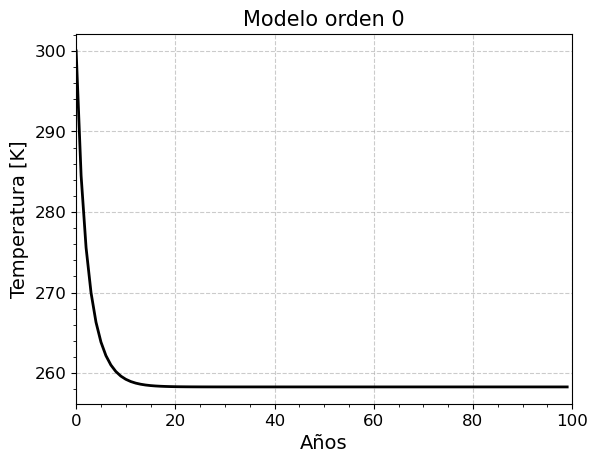

In [638]:
plt.plot(times/dt,T,c='k',linewidth=2)
lineplot_setup(0,100,'Años','Temperatura [K]',title='Modelo orden 0')

---
<a name='ej-1'></a>
### **<font color="DodgerBlue">Ejercicio 5 - Modelo orden 0 numérico </font>**

<font color="DarkBlue"> 1. Resuelve el modelo anterior con condiciones iniciales de 290 K. Luego repita, el ejercicio pero con una emisividad de 0.66. 
    
<font color="DarkBlue"> 2. Grafique sus 2 resultados indicando claramente en la leyenda las diferentes soluciones. Explique qué está pasando con sus experimentos físicamente. 

---

En las clases pasadas, básicamente habíamos resuelto el mismo modelo que en las celdas anteriores pero en condiciones de equilibrio. En el ejemplo anterior, vemos que las soluciones tienden a un equilibrio rápidamente. Para el caso de emisividad 1, esta solución es la temperatura de equilibrio ($T_e$). Cuándo la temperatura inicial es diferente de $T_e$, qué proceso es el que hace que cambie la temperatura y tienda a la de equilibrio. Por ejemplo, en el ejemplo y ejercicio anterior, qué sucede. 

### **<font color="ForestGreen">  El modelo de Budyko </font>**

En clase vimos que el ruso Budyko propuso una versión del modelo de balance de energía ligeramente diferente. Veremos sus diferencias una por una. 



El primer cambio que veremos hace Budyko a nuestro modelo 0D, es la parametrización del albedo. Este parámetro pasa de ser una constante a una variable.

1. Parametrización del albedo. 
    Budyko define al albedo como función de la temperatura $\alpha(T)$, ya no como constante planetaria. 
    
    En particular, Budyko utiliza una función por pedazos o saltos donde el albedo toma valores diferentes dependiendo de qué temperatura tenga la banda latitudinal en cuestión. 
    
    \begin{align}
    \alpha_\lambda(T)=
    \begin{cases}
      \alpha_1 & \text{if } T < T_1 \\
      \alpha_1+\frac{(\alpha_2-\alpha_1)[T-T_1]}{(T_2-T_1)} & \text{if } T_1\leq T \leq T_2\\
      \alpha_2 & \text{if } T > T_2\\
    \end{cases}
    \end{align}
    
Esta función básicamente intenta replicar el comportamiento observado del albedo en un planeta lleno de agua, donde si la temperatura llega a ser menor de cierto valor $T_1$, se vuelve hielo y toma un albedo alto ($\alpha_1=0.7$) y si la temperatura está muy por encima del punto de congelación ($T > T_2$) toma un valor de albedo pequeño ($\alpha_2=0.2$). En el intervalo intermedio, se asume que el océano es una mezcla de hielo con agua, entonces su albedo toma el valor de una función lineal que va desde el albedo de hielo hasta el del agua, dependiendo de la temperatura. 

En la siguiente celda, definimos esta función del albedo donde las temperaturas límite son:

\begin{align}
T_1= -10 ^\circ C
\end{align}

\begin{align}
T_2= 7 ^\circ C
\end{align}



In [639]:
def alpha_T(T,T1=-10,T2=7,alpha1=0.7,alpha2=0.2):
    # funcion alpha segun Budyko
    # T es variable obligatoria (en grados Celsius) y las demas opcionales
    # condiciones
    # condicion de hielo
    if T<T1:
        alpha=alpha1
    # condicion de agua liquida
    elif T>T2:
        alpha=alpha2
    # condicion intermedia
    else:
        alpha=alpha1+(alpha2-alpha1)*(T-T1)/(T2-T1)
    return alpha

# imprimimos 3 resultados para ver un poco de como funciona
print(alpha_T(-20))
print(alpha_T(2))
print(alpha_T(24))    

0.7
0.34705882352941175
0.2


Podemos probar este código y graficarlo para un vector de temperatura que vaya desde el punto de congelamiento hasta temperaturas cálidas para el océano.

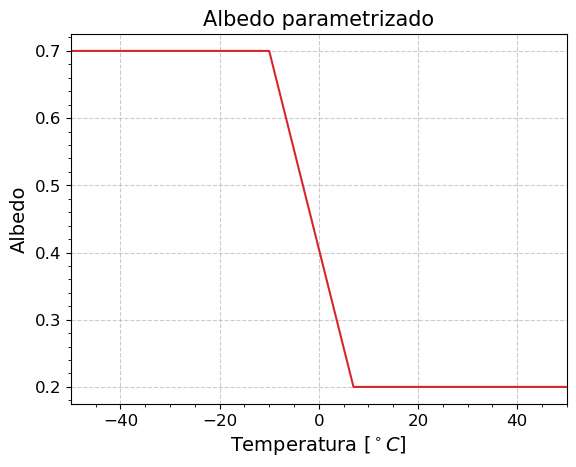

In [640]:
# vector de temperatura 
Tvec=np.arange(-50,51)
# inicializamos el vector alpha
alpha_i=[]
# tenemos que resolver caso por caso, por que?
# ciclo de iteracion sobre cada temperatura 
for Ti in Tvec:
    alpha_i.append(alpha_T(Ti))
    
# grafica
plt.plot(Tvec,alpha_i,c='tab:red')
lineplot_setup(-50,50,ylab='Albedo',xlab='Temperatura $[^\circ C]$',title='Albedo parametrizado')

---
<a name='ej-1'></a>
### **<font color="OrangeRed">Ejemplo </font>**

<font color="DarkRed"> En el siguiente ejemplo vamos a practicar con nuestra función del albedo parametrizado de Budyko. El objetivo es entender un poco más lo que hacen los parámetros de temperaturas y albedos. Para esto, modificaremos primero los albedos $\alpha_1$ y $\alpha_2$ y luego, en otro experimento, las temperaturas $T_1$ y $T_2$ con respecto a los parámetros originales.
    
<font color="DarkRed">   1. Experimento control:  $\alpha_1=0.7$ y $\alpha_2=0.2$, $T_1= -10 ^\circ$ C y $T_2= 7 ^\circ$ C.
    
<font color="DarkRed">    2. Experimento 1: $\alpha_1=0.85$ y $\alpha_2=0.1$, $T_1= -10 ^\circ$ C y $T_2= 7 ^\circ$ C.
    
<font color="DarkRed">    3. Experimento 2: $\alpha_1=0.7$ y $\alpha_2=0.1$, $T_1= -5 ^\circ$ C y $T_2= 5 ^\circ$ C.
</font>

---

In [641]:
alpha_exp1=[]
alpha_exp2=[]
# tenemos que resolver caso por caso, por que?
# ciclo de iteracion sobre cada temperatura 
for Ti in Tvec:
    alpha_exp1.append(alpha_T(Ti,alpha1=0.85,alpha2=0.1))
    alpha_exp2.append(alpha_T(Ti,T1=-5,T2=5))

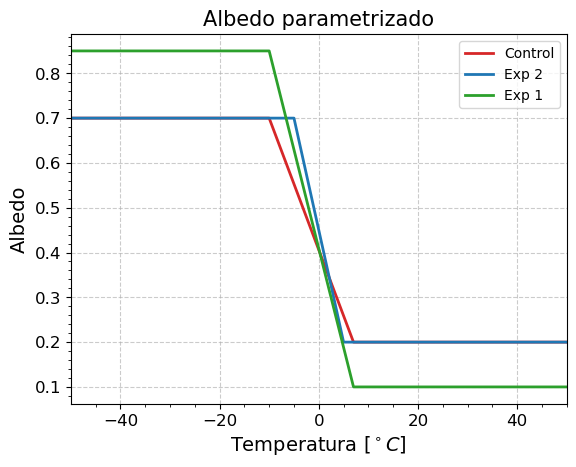

In [642]:
plt.plot(Tvec,alpha_i,c='tab:red',linewidth=2,label='Control')
plt.plot(Tvec,alpha_exp2,c='tab:blue',linewidth=2,label='Exp 2')
plt.plot(Tvec,alpha_exp1,c='tab:green',linewidth=2,label='Exp 1')
plt.legend()
lineplot_setup(-50,50,ylab='Albedo',xlab='Temperatura $[^\circ C]$',title='Albedo parametrizado')

Una vez que hemos reescrito nuestro albedo y ya no es constante, tenemos que modificiar ligeramente las ecuaciones y un poco menos ligeramente el código. 

Ahora resolveremos la ecuación:

\begin{align}
 \frac{dT}{dt}= \frac{1}{C} \bigg(\frac{\overline{Q}(1-\alpha(T))}{4}-\epsilon\sigma T_s^4\bigg)
\end{align}

y nuestra aproximación numérica toma la forma de: 

\begin{align}
T_{i+1} = T_i+\frac{\Delta t}{C} \bigg(\frac{\overline{Q}(1-\alpha(T_{i}))}{4}-\epsilon\sigma T_i^4\bigg)
\end{align}

Para simplificar un poco el código, podemos escribir una ecuación/función de balance que calcule la radiación entrante menos la saliente en cada paso de tiempo, es decir:

\begin{align}
\bigg(\frac{\overline{Q}(1-\alpha(T_{i})}{4}-\epsilon\sigma T_i^4\bigg)
\end{align}

Primero escribimos código para calcular este balance.


In [643]:
def balance(Qbar,epsilon,Ti):
    # radiacion entrante
    incoming=Qbar*(1-alpha_T(Ti-273.15))#/4.
     #radiacion saliente
    outgoing=epsilon*sigma*(Ti**4)#*(1/(2**(1/4)))
    #print(incoming,outgoing)
    return incoming-outgoing
# evaluamos el balance para un promedio tipo de 300 w m-2
balance(300,epsilon,273.15)

-121.61983610550647

¿Qué quiere decir que el balance anterior sea negativo?

¿Hay más salidas o entradas de energía?

Vamos a jugar con este modelo de albedo para algunas temperaturas iniciales y valores de insolación de juguete, para tratar de entenderle más. Pondremos nuestra matriz de insolación a descansar por ahora. 

Resolveremos numéricamente el modelo igual que antes pero para una temperatura inicial de 300 K y una insolación constante de 500 W m$^{-2}$.


In [644]:
# inicio de tiempo y vectores
dt = 60. * 60. * 24. * 365.
times=np.arange(0,100*60. * 60. * 24. * 365.,dt)
T=np.zeros(len(times))

# condiciones iniciales y frontera
T0 = 300
Q=500

for it,ti in enumerate(times):
    if it==0:
        T[it]=T0
    else:
        # aqui resolvemos el modelo propiamente
        T[it] = T[it-1] + dt / C * balance(Q,epsilon,T[it-1])


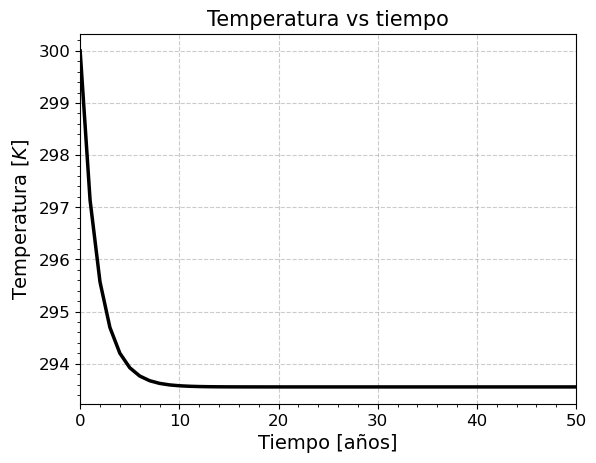

In [645]:
plt.plot(times/dt,T,c='k',linewidth=2.5)
lineplot_setup(0,50,
      xlab='Tiempo [años]',ylab='Temperatura $[K]$',title='Temperatura vs tiempo')

---
<a name='ej-1'></a>
### **<font color="DodgerBlue">Ejercicio 6 - Retroalimentación hielo-albedo </font>**

<font color="DarkBlue"> 1. Resuelve el modelo anterior con condiciones iniciales de 305 K y luego con condiciones de 273.15 K. 
    
<font color="DarkBlue"> 2. Grafique sus 2 resultados indicando claramente en la leyenda las diferentes soluciones. Explique qué está pasando con sus experimentos físicamente. ¿Por qué las dos temperaturas iniciales terminan en 2 estados de equilibrio diferentes?

---

Una vez hecho esto, podría ser útil escribir nuestro método de solución como función. Entonces repetimos el código anterior pero en forma de función que depende de 3 parámetros, del paso de tiempo $\Delta t$, de la insolación $Q$ y de la condición inicial de temperatura $T_0$. 

Esta función al final, sólo regresa el último valor de las soluciones de temperatura, que pensaremos como la condición final, o de **equilibrio**.

Noten que por default, solo se resuelve el modelo por 50 años. 

In [646]:
def solve_T(T0,Q,dt,years_to_solve=50):
    times=np.arange(0,years_to_solve*dt,dt)
    T=np.zeros(len(times))
    for it,ti in enumerate(times):
        if it==0:
            T[it]=T0
        else:
            T[it] = T[it-1] + dt / C * balance(Q,epsilon,T[it-1])
    return T[-1]

Ahora vamos a utilizar esta versión del código para calcular qué es lo que pasa en todas las condiciones iniciales posibles para la misma insolación $Q$.

In [647]:
# vector de temperaturas iniciales
T0s=np.arange(240,310,1)
# insolacion prueba
Q=500
# iniciamos el vector de temperatura solucion
T_eq=np.zeros(len(T0s))
for i_T0,T0 in enumerate(T0s):
    # resolvemos la EDO en cada T0, para la misma Q
    T_eq[i_T0]=solve_T(T0,Q,dt)
    # print raro para ver algunas soluciones en intervalos de 10 en 10 K
    if i_T0%10==0:
        print(T0,T_eq[i_T0])

240 229.7187108632279
250 229.7188074686152
260 229.7188894983491
270 229.71908727684925
280 293.55422257592255
290 293.554222575936
300 293.55422257594694


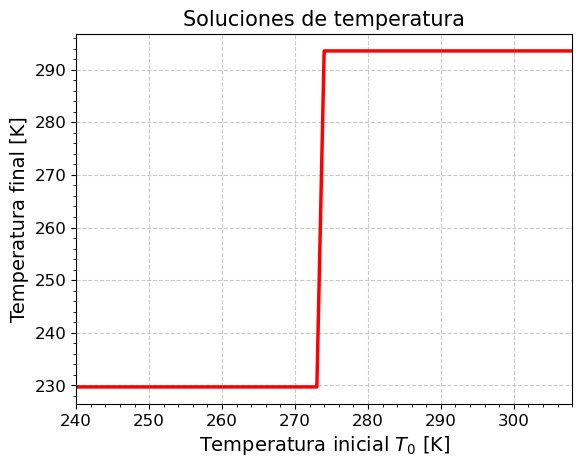

In [648]:
plt.plot(T0s,T_eq,c='red',linewidth=2.5)
lineplot_setup(240,308,
      xlab='Temperatura inicial $T_0$ [K]',ylab='Temperatura final [K]',title='Soluciones de temperatura')

Como se observa en la figura anterior, la temperatura salta entre dos estados de equilibrio. 
Uno de ellos implica que la superficie se congela y se vuelve hielo y el otro que la Tierra llega a una temperatura por encima del punto de congelación.

2. Dependencia latitudinal de la insolación (y del albedo). 

Para esto utilizaremos nuestra función de insolación $Q$ del Tema del modelo de orden 0. Esta función de insolación ya incluye factores geométricos en la distribución de la irradiancia sobre la esfera planetaria, que fue una de las adecuacion de Budyko al modelo de orden cero. 

Cargamos nuestra función $\overline{Q}$ y toda su parentela de funciones que la componen en la siguiente celda. Note que $\overline{Q}$ ha sido modificada para que utilice valores por default de la constante solar y del día del año correspondiente a marzo 21 (día 80 del año).



In [649]:
def delta(day):
    ans=[0.006918,-0.399912,-0.006758,-0.002697]
    bns=[0,0.070257,0.000907,0.001480]
    suma=0
    for n,ai in enumerate(ans):
        suma+=ai*np.cos(n*theta_d(day))+bns[n]*np.sin(n*theta_d(day))
    return suma
def hour_angle(phi,day):
    argument=np.tan(np.deg2rad(phi))*np.tan(delta(day))
    # np arc cos es el arco coseno de un argumento
    h0=np.arccos(-argument)
    return h0
def theta_d(day):
    return 2*np.pi*day/365
def distance_to_sun(day):
    ans=[1.00011,0.034221,0.000719]
    bns=[0,0.001280,0.000077]
    suma=0
    for n,ai in enumerate(ans):
        suma+=ai*np.cos(n*theta_d(day))+bns[n]*np.sin(n*theta_d(day))
    return suma
def Q_day_mean(day,phi,S_0=1367):   
    """
    ** Insolacion promedio anual **

    *Parameters*

    phi: `np.float`
        Valor numérico flotante para la latitud, en grados. 
    day: `float`
        Valor flotante, número entero, del dia del año. 
    d: `np.float`
        Valor flotante de la distancia entre la Tierra y el Sol normalizada por la distancia promedio 
        (d/\overline{d}). Por default, toma valor de 1, o sea que utiliza la distancia promedio.
        
    .. nota::

        Esta función calcula la insolacion promedio diaria, a diferencia de la primera definicion, 
        como funcion de 3 parametros fundamentales, la distancia Tierra-Sol, el dia del año, y la latitud.

    *Returns*
        Q: `np.float` La insolacion promedio diaria para estos tres parametros
        Unidades: W m$^{-2}$ m$^{-1}$.

    """
   
    Delta = delta(day)
    d=distance_to_sun(day)
    if (np.pi/2)-Delta<np.deg2rad(phi):
        h_0=np.deg2rad(180)
    elif -(np.pi/2)-Delta>np.deg2rad(phi):
        h_0=np.deg2rad(180)
    elif np.deg2rad(phi)>(np.pi/2)+Delta:
        h_0=0
    elif np.deg2rad(phi)<-(np.pi/2)+Delta:
        h_0=0
    else:
        h_0=hour_angle(phi,day)
    Q_mean = (S_0/np.pi)*d*((h_0)*np.sin(np.deg2rad(phi))*np.sin(Delta)+np.cos(np.deg2rad(phi))*np.cos(Delta)*np.sin(h_0))
    return Q_mean

De esta manera, podemos calcular la insolación para cada banda de latitud. Volvemos a utilizar bandas de latitud separadas por un intervalo de 0.5 grados. 

En la siguiente celda se calcula la insolación promedio para el día del año 80, que es el año por default en la función `Q_mean`. Calculamos la insolación para cada latitud (1D).

In [650]:
# def vector de latitudes
latitudes=np.arange(-90,90.1,2)
# def vector de dias 
days=np.arange(1,366)
# iniciamos vector de insolacion lleno de 0s
Q_annual=np.zeros((len(days),len(latitudes)))
for idd,day in enumerate(days):
    for ilat,lat in enumerate(latitudes):
        Q_annual[idd,ilat]=Q_day_mean(day,lat)
print(Q_annual.shape)
print(np.mean(Q_annual))
print(np.mean(Q_annual,axis=0))
Q_annual_mean=np.mean(Q_annual,axis=0)

(365, 91)
298.2870216118197
[173.01590843 173.24389324 173.930534   175.08047527 176.70273975
 178.81001024 181.4207346  184.56044265 188.26469729 192.58392152
 197.59536938 203.43240722 210.46487408 218.85437752 227.89285337
 237.28921371 246.87763957 256.54605036 266.21224503 275.8127039
 285.29645446 294.62138807 303.75190738 312.65735516 321.31092844
 329.68890757 337.77009686 345.53541125 352.96756622 360.05084229
 366.77090405 373.11465993 379.0701527  384.62647331 389.77369282
 394.5028084  398.80570024 402.67509727 406.10454975 409.08840746
 411.62180228 413.7006346  415.32156258 416.48199408 417.18008064
 417.41471347 417.18552101 416.49286818 415.33785718 413.72232984
 411.64887173 409.12081813 406.14226216 402.71806547 398.85387188
 394.5561248  389.83208902 384.68987815 379.13848893 373.18784431
 366.8488474  360.13344967 353.05473697 345.62703916 337.86607031
 329.78910962 321.41523701 312.76564318 303.8640429  294.73723447
 285.41587062 275.93554431 266.33836003 256.67528

Puede ser útil graficar cómo fue que quedó nuestra Q como función de la latitud. 


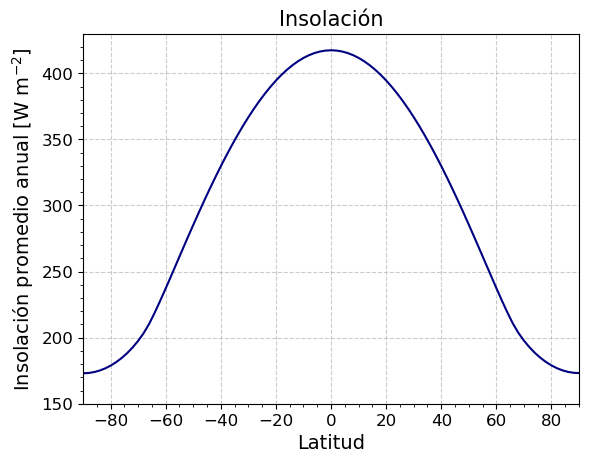

In [651]:
plt.plot(latitudes,Q_annual_mean,c='navy')
lineplot_setup(-90,90,ymin=150,
      xlab='Latitud',ylab='Insolación promedio anual [W m$^{-2}$]',title='Insolación')


Una vez que hemos obtenido la solución para 1 sola insolación queremos obtener la variación latitudinal de las soluciones. Es decir, resolver la temperatura para nuestro vector de `Q_all` que acabamos de calcular y graficar.

Ahora sí vamos a resolver nuestra ecuación diferencial pero para cada latitud. Esto tiene un componente dificultad mayor, ya que conceptualmente puede volverse difícil seguir el hilo de a dónde vamos, qué queremos o por qué estamos haciendo todo este menjurje a las 8 de la mañana. 

**A dónde vamos** -> a resolver el modelo de Budyko. Queremos calcular la temperatura de equilibrio estacionario de la ecuación diferencial en cada banda de latitud $T(\lambda)$.

**Cómo le hacemos** -> utilizando una ecuación diferencial y una función que la resuelve, una condición frontera de insolación, y una condición inicial de temperatura. 

¿Qué nos falta?

**Condiciones iniciales**

In [652]:
def Ts_ef(alpha,Q,f=1):
    # funcion de temperatura superficial para el efecto invernadero variable
    sigma=5.67e-8
    Ts=(2*(Q*(1-alpha))/(sigma*(2-f)))**(1/4)
    return Ts

La celda superior es una solución de las ecuaciones de la práctica anterior donde obteníamos un balance entre la insolación y la ley de Stefan Boltzmann:

\begin{align}
2\overline{Q(\lambda)}(1-\alpha)=(2-f)\sigma T_{s,\lambda}^4
\end{align}

donde $\overline{Q(\lambda)}$ es la insolación en cada banda de latitud, $T_{s,\lambda}$ es la temperatura superficial en cada banda de latitud y $f$ es el par. Y en este caso usamos un albedo constante a 0.3. A partir de esta formulación, podemos resolver el modelo para encontrar una solución para la temperatura que serán nuestras condiciones iniciales $T_{s,0}(\lambda)$.

\begin{align}
T_{s,0}(\lambda) = \sqrt[4]{\frac{2Q(\lambda)(1-\alpha)}{\sigma(2-f)} }
\end{align}

Es importante recalcar que esta formulación es únicamente para iniciar el modelo. Queremos una primer aproximación a cómo se debe de ver el campo de temperatura para esta condición de insolación que hemos impuesto, en ella el albedo sigue siendo una constante planetaria. Recuerden que en la formulación del modelo de Budyko el albedo variable es el cambio más trascendental.

In [653]:
# evaluamos la funcion en la insolacion para albedo 0.3 y efecto invernadero 1
Ts_0=Ts_ef(0.3,Q_annual_mean,1)
# imprimimos el maximo
print(np.nanmax(Ts_0))

318.6237777858927


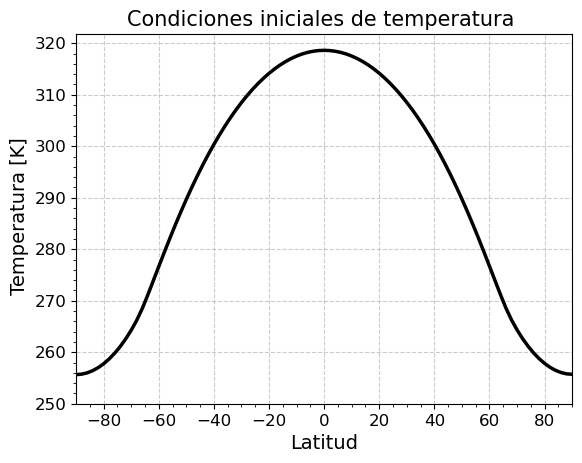

In [654]:
plt.plot(latitudes,Ts_0,c='k',linewidth=2.5)
lineplot_setup(-90,90,ymin=250,
      xlab='Latitud',ylab=' Temperatura [K]',title='Condiciones iniciales de temperatura ')

Una vez armados hasta los dientes con condiciones iniciales de temperatura y una insolación definida en cada banda de latitud, podemos resolver para encontrar T según nuestro modelo numérico. En particular, nos interesan las soluciones una vez que ya llegamos a un equilibrio. Entonces sólo nos vamos a quedar con el último tiempo.

\begin{align}
T_{i+1,\lambda} = T_i(\lambda)+\frac{\Delta t}{C} \bigg(\frac{\overline{Q(\lambda)}(1-\alpha(T_{i}(\lambda)))}{4}-\epsilon\sigma T_i^4(\lambda)\bigg)
\end{align}

In [655]:
# T_lat es nuestro vector solucion
T_lat = np.zeros(len(latitudes))
for ilat,lat in enumerate(latitudes):
    # en cada latitud, evaluamos la funcion para la condicion inicial Ts_0 y la insolacion Q_all
    T_lat[ilat]=solve_T(Ts_0[ilat],Q_annual_mean[ilat],dt)

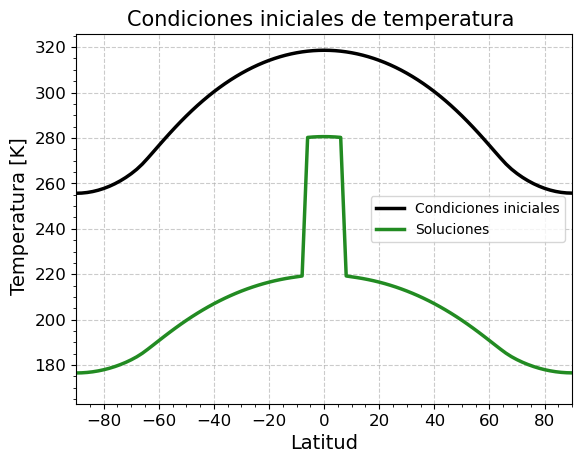

In [656]:
plt.plot(latitudes,Ts_0,c='k',linewidth=2.5,label='Condiciones iniciales')
plt.plot(latitudes,T_lat,c='forestgreen',linewidth=2.5,label='Soluciones')
plt.legend(fancybox=True)
lineplot_setup(-90,90,ymin=163,
      xlab='Latitud',ylab=' Temperatura [K]',title='Condiciones iniciales de temperatura ')

El resultado indica que este modelo produce un planeta congelado en latitudes medias y los polos (hacia los polos de  30$^\circ$S y 30$^\circ$N). Es decir, excepto en las latitudes tropicales, donde la insolación es suficiente para mantener la temperatura por encima del punto de congelación, la retroalimentación hielo-albedo es tan poderosa que lleva al resto del planeta a estar muy por debajo del punto de congelación.

Lo que sucede en este modelo es que para una emisividad alta, o un efecto invernadero relativamente poco efectivo, la cantidad de radiación que escapa directamente al espacio es suficiente para enfriar el planeta en latitudes con baja insolación. 

Luego, la retroalimentación de hielo-albedo hace su trabajo. 

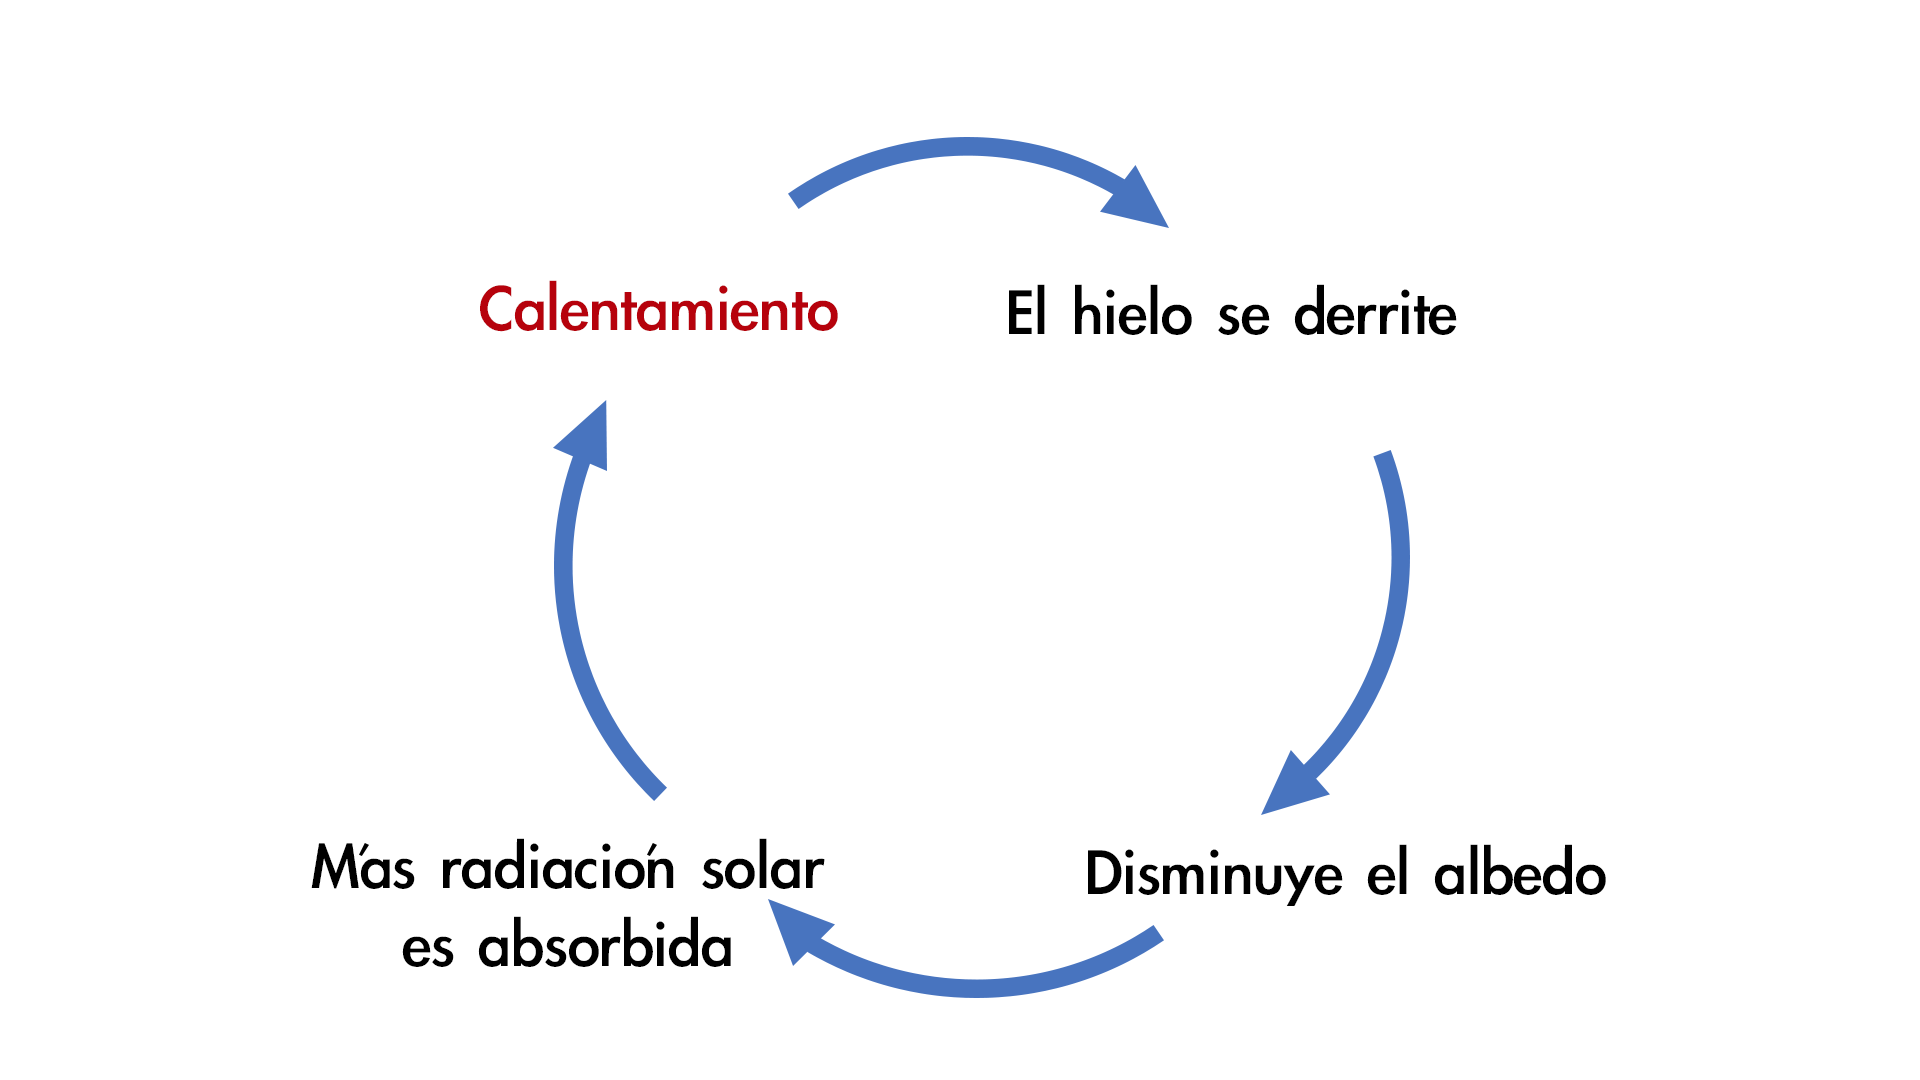

Podemos hacer un segundo experimento pero variando la emisividad. Nuestro primer experimento fue con emisividad de casi 1, 0.95, por lo que si recordamos nuestros experimentos con el modelo de orden 0, cuando el efecto invernadero era pequeño, las temperaturas salían muy por debajo del punto de congelación. Entonces no es tan alocado ver a la Tierra congelada en estos experimentos. 

Si bajamos la emisividad, aumentamos el efecto invernadero y veamos el resultado.

In [657]:
# cambiamos epsilon
epsilon=0.66
T_lat_2 = np.zeros(len(latitudes))
for ilat,lat in enumerate(latitudes):
    T_lat_2[ilat]=solve_T(Ts_0[ilat],Q_annual_mean[ilat],dt)

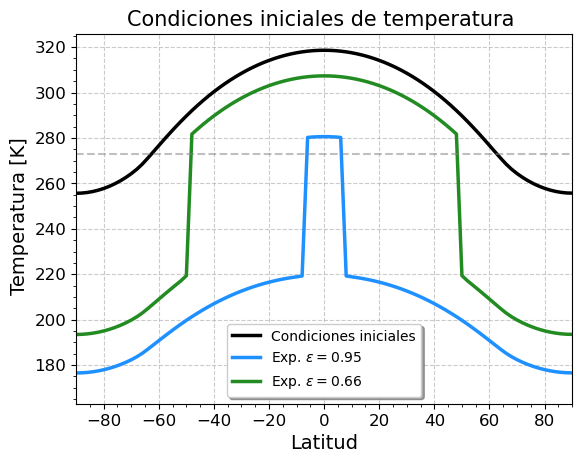

In [658]:
plt.plot(latitudes,Ts_0,c='k',linewidth=2.5,label='Condiciones iniciales')
plt.plot(latitudes,T_lat,c='dodgerblue',linewidth=2.5,label='Exp. $\epsilon=0.95$')
plt.plot(latitudes,T_lat_2,c='forestgreen',linewidth=2.5,label='Exp. $\epsilon=0.66$')
# graficamos linea del punto de congelacion
plt.axhline(y=273.15,c='gray',linestyle='--',alpha=0.5)
plt.legend(shadow=True)
lineplot_setup(-90,90,ymin=163,
      xlab='Latitud',ylab=' Temperatura [K]',title='Condiciones iniciales de temperatura ')

Habiendo aumentado el efecto invernadero, vemos que la extensión del hielo disminuido y que la temperatura máxima tropical aumenta también, acercándose a las condiciones iniciales. Ahora hay mar abierto todavía a los 45$^\circ$S y 45$^\circ$N.

---
<a name='ej-1'></a>
### **<font color="DodgerBlue">Ejercicio 7 - Modelo de Budyko 1 </font>**

<font color="DarkBlue"> 1. Haga dos experimentos variando los parámetros de la parametrización de albedo y variando los parámetros de emisividad. Usted escoja cómo y cuáles parámetros modificar. 
    
<font color="DarkBlue"> 2. Grafique sus dos experimentos comparados con el experimento control (cuyos resultados están guardados en la variable `T_lat`) indicando claramente en la leyenda las diferentes soluciones. Explique qué fue lo que esperaba obtener con sus experimentos y si sus gráficas y resultados apoyan sus hipótesis.

---

### **<font color="ForestGreen">  Inclusión de transporte meridional en las ecuaciones del modelo de Budyko </font>**

El transporte meridional de energía es un proceso que se genere por la diferencia meridional de temperatura que hemos podido calcular utilizando estas versiones del modelo de balance de energía. Fundamentalmente, la radiación establece un campo de temperatura inicial, que luego la dinámica oceánica y atmosférica se encarga de transportar energía. 

Los diferentes procesos que se encargan de esto son:

- La convección tropical y la celda de Hadley (forzamiento mecánico). 
- Los eddies o transientes en latitudes medias.
- La circulación termohalina. 
- Las corrientes océanicas causadas por el viento.

Budyko decidió parametrizar todos estos procesos con una sola ecuación. También se le llama enfriamiento Newtoniano ("Newtonian cooling"). La ecuación dice que:

\begin{align}
F=k_t(T_{\lambda}-\overline{T})
\end{align} 

donde $F$ es el transporte en W m$^{-2}$, $k_t$ es un coeficiente de transporte con unidades de J s$^{-1}$ $m^{-2}$ K$^{-1}$, $T_\lambda$ es la temperatura en una banda de latitud y $\overline{T}$ es la temperatura global promedio. 

Esta parametrización nos dice, que si un punto de latitud tiene una diferencia grande con la temperatura global promedio entonces tiene que transportar energía. Ya sea importar energía si está fría esa latitud o exportar energía si tiene una temperatura mayor a la promedio. El objetivo es redistribuir la energía que la insolación por sí sola distribuye de manera poco uniforme por la inclinación de la Tierra.

Esta es una segunda parametrización con la que nos encontramos. ¿Creemos que ya podemos definir qué es una parametrización?

### **<font color="ForestGreen">  Definición de parametrización 1 </font>**



### Def en clase

Una vez que hemos definido esta parametrización podemos incluirla en nuestra ecuación diferencial. Cuidado con el signo.

\begin{align}
C\frac{dT}{dt}=-k_t(T_{\lambda}-\overline{T})+S_{abs}-OLR
\end{align}

En la ecuación anterior el transporte meridional baja la temperatura cuando la banda de latitud exporta energía y gana temperatura cuando la banda de latitud importa energía. $S_{abs}$ es la energía entrante y OLR es la energía saliente en onda larga (outgoing longwave radiation). 
O sea que dicho de otro modo esta ecuación se puede escribir como:

\begin{align}
C\frac{dT}{dt}=-k_t(T_{\lambda}-\overline{T})+Q(1-\alpha_i(T))-\epsilon\sigma T^4
\end{align}

Pasándola a Python:

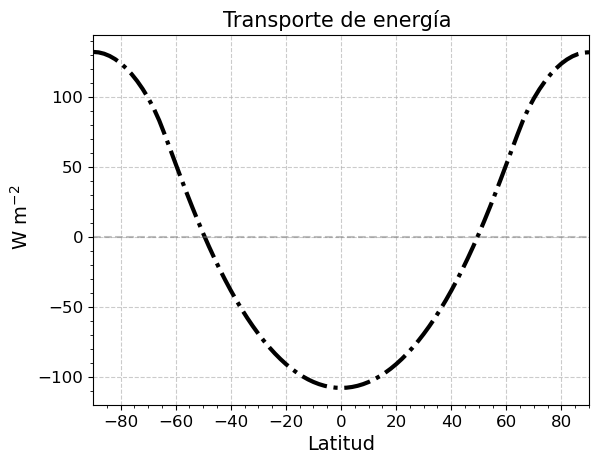

In [659]:
def transport(Tl,Tmean,k_T):
    """
    Enfriamiento newtoniano.
    
    Tl es la temperatura de la banda de latitud objetivo.
    Tmean es la temperatura promedio global
    k_T es el coeficiente de transporte
    """
    return k_T*(Tl-Tmean)
# valor de Budyko para el coeficiente de transporte
k_t=3.81
# evaluamos la funcion en el vector de condiciones iniciales
f_exp=transport(Ts_0,np.mean(Ts_0),k_t)

# grafica de resultado de transporte (ojo con el signo negativo)
plt.plot(latitudes,-f_exp,c='k',linewidth=3,linestyle='-.')
plt.axhline(y=0,c='gray',linestyle='--',alpha=0.5)
lineplot_setup(-90,90,
      xlab='Latitud',ylab=' W m$^{-2}$',title='Transporte de energía ')

Ahora sólo agreguemos el término de transporte y el valor de la constante $k_t$ a nuestra función que resuelve numéricamente la ecuación diferencial de calor y energía .

In [660]:
def solve_T(Tvec,Qvec,lats,dt,years_to_solve=75,kt=3.81,epsilon=0.9):
    """
    Modelo de Budyko con transporte de energia
    
    Parameters:
    Tvec : np.array
        Un vector de numpy con condiciones iniciales de T. Tiene que tener la misma longitud que lats
    Qvec : np.array
        Un vector de numpy con condiciones frontera de Q.
    lats : np.array
        Vector de numpy, con latitudes donde se resolvera el modelo. 
    dt : int
        Resolución o salto de tiempo o espacio

    Parametros opcionales (kwargs):
    kt: float 
        coeficiente de transporte
    epsilon: float 
        parametro de efecto invernadero
    years_to_solve: int
        cuanto tiempo para encontrar la solución.

    Returns:
    Tsol : float
        Temperatura solucion como vector funcion de la latitud.
 
    """
    times=np.arange(0,years_to_solve*dt,dt)
    fact=dt/C
    Ti=np.zeros((len(Tvec),len(times)))
    for it,ti in enumerate(times):
        for ilat,lat in enumerate(lats):
            if it==0:
                Ti[ilat,it]=Tvec[ilat]
               # print(Tvec[ilat])
            else:
                transporte=-transport(Ti[ilat,it-1],np.mean(Ti[:,it-1]),kt)
                balance_R= balance(Qvec[ilat],epsilon,Ti[ilat,it-1])
                Ti[ilat,it] = Ti[ilat,it-1] +  fact*( balance_R+transporte)
                              
    return Ti[:,-1]

---
<a name='ej-1'></a>
### **<font color="OrangeRed">Ejemplo </font>**

<font color="DarkRed"> En el siguiente ejemplo vamos a practicar con el modelo de Budyko con transporte incluido. El objetivo es entender un poco más lo que hace el parámetro de transporte $k_t$ sobre las soluciones de temperatura. Para esto, usaremos la parametrización estándar de albedo, y dos valores para el transporte, el primero de ellos es el valor que utilizó Budyko. 
    
<font color="DarkRed">   1. Experimento control:  $k_t=3.81$ J s$^{-1}$ m$^{-2}$. $\alpha_2=0.2$, $T_1= -10 ^\circ$ C y $T_2= 7 ^\circ$ C. $\epsilon=0.6$.
    
<font color="DarkRed">    2. Experimento 1:  $k_t=1$ J s$^{-1}$ m$^{-2}$. $\alpha_2=0.2$, $T_1= -10 ^\circ$ C y $T_2= 7 ^\circ$ C. $\epsilon=0.6$.
    
---

In [661]:
Ts_0[np.isnan(Ts_0)] = 0
T_transport=solve_T(Ts_0,Q_annual_mean,latitudes,dt,kt=3.81,epsilon=0.6)
T_transport_2=solve_T(Ts_0,Q_annual_mean,latitudes,dt,kt=1,epsilon=0.6)

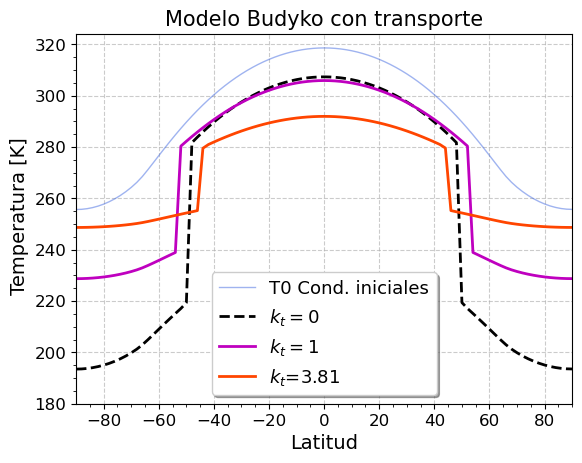

In [662]:
plt.plot(latitudes,Ts_0,label='T0 Cond. iniciales',linewidth=1,c='royalblue',alpha=0.5)
plt.plot(latitudes,T_lat_2,label='$k_t=0$',linewidth=2,c='k',linestyle='--')
plt.plot(latitudes,T_transport_2,label='$k_t=1$',linewidth=2,c='m')
plt.plot(latitudes,T_transport,label='$k_t$=3.81',linewidth=2,c='orangered')
# fontsize hace mas grande la letra en la leyenda, shadow genera una sombrita en el borde
# fancybox hace la caja de leyenda más fancy... usted es fancy o no?
plt.legend(fontsize=13,fancybox=True,shadow=True)
lineplot_setup(-90,90,ymin=180,ymax=324,
      xlab='Latitud',ylab=' Temperatura [K]',title='Modelo Budyko con transporte')

Entre más transporte, más se enfrían los trópicos y más temperatura tienen los polos. Sin embargo, sigue habiendo una discontinuidad y una gran fracción de la Tierra se encuentra congelada.

El modelo de Budyko con transporte ha subido el nivel de complejidad comparado con el modelo de orden cero. El albedo, en este nuevo modelo, depende de la latitud y de la temperatura de cada banda de latitud, lo cual es más realista. Sin embargo, su formulación en una función por partes genera _bifurcaciones_ en las soluciones donde la **retroalimentación hielo-albedo** se vuelve extremadamente fuerte. De hecho, es demasiado fuerte en este modelo, en la realidad, otros procesos atenúan o desaceleran el poder de esta retroalimentación. 

Un proceso que atenúa este fuerte impacto del hielo-albedo es el **transporte meridional de energía** que mueve energía de latitudes tropicales donde la insolación genera un balance energético positivo, entra más radiación de la que sale. Este proceso lo hemos parametrizado de la forma más rudimentaria, ya que la dinámica atmosférica y océanica está muy alejada de parecerse a la simple ecuación que utilizamos. 

Todas las parametrizaciones no dejan de ser caricaturas de la realidad. 

---
<a name='ej-1'></a>
### **<font color="DodgerBlue">Ejercicio 8 - Modelo de Budyko 2 </font>**

<font color="DarkBlue"> 1. Repita los experimentos del ejercicio 7 pero ahora con transporte. Es decir, utilizando los mismos dos experimentos (+ el control) de ese ejercicio ahora repitalos pero para los dos valores del coeficiente de transporte que utilizamos en el ejemplo. En total, debe tener 4-6 experimentos.
    
<font color="DarkBlue"> 2. Grafique sus experimentos en gráficas multi-panel. Exactamente cómo y cuántos paneles, queda a su discreción, siempre y cuándo justifique, verbalmente o por escrito, su decisión.

---

### **<font color="ForestGreen"> Algunos cambios de Sellers </font>**

**La parametrización de efecto invernadero.**

\begin{align}
OLR= \sigma T^4 [1-m \,tanh(\gamma T^6)]
\end{align}

donde $\gamma$ es una constante que vale 19$\times10^{−16}$ y $m$ es un coeficiente de atenuación  que Sellers toma como 0.5 (sin unidades). 

**La parametrización de albedo.**

  \begin{align}
    \alpha(\lambda,T)=
    \begin{cases}
         b(\lambda)-0.009T & \text{si } T > 283 K \\
       b(\lambda)-2.548 & \text{si } T \ge 283 K \\
    \end{cases}
    \end{align}


**La parametrización de transporte.**

\begin{align}
F = D \nabla^2T = D\bigg[ \frac{\partial^2T}{\partial \phi^2} - tan(\phi) \frac{\partial T}{\partial \phi}\bigg]
\end{align}

Para esto haremos una clase que contendrá nuestro modelo de Budyko-Sellers con todas las diferentes parametrizaciones. 

En Python, la programación orientada a objetos (POO) es una metodología que permite organizar el código de una manera más estructurada y modular. El objeto `class` es una de las características clave de la POO en Python, y se utiliza para definir nuevas clases, que son plantillas para la creación de objetos.

1. Definición de Clases: En Python, puedes definir una clase utilizando la palabra clave class, seguida del nombre de la clase. Por convención, los nombres de las clases suelen escribirse en CamelCase (es decir, con la primera letra de cada palabra en mayúscula).

2. Atributos de Clase: Las clases pueden tener atributos que almacenan datos asociados con la clase. Estos atributos se definen dentro de la clase y pueden ser accedidos mediante la instancia de la clase.

3. Métodos de Clase: Los métodos son funciones definidas dentro de una clase que pueden realizar operaciones en los datos de la clase. El primer parámetro de cada método de clase es self, que es una referencia a la instancia de la clase.

En la siguiente función, algunos atributos de la clase son la constante de Stefan Boltzmann $\sigma$ o la constante de transporte $k_t$. Algunos métodos de la clase son `alpha_budyko` o `newtonian_transport`.

In [663]:
import scipy

class Budyko_Sellers:
    def __init__(self,latitudes,OLR_param,albedo_param,transport_param,kt=3.81,epsilon=0.66,
                 C=4e8,alpha_init=0.17,S0=1370,dt = 60. * 60. * 24. * 365,dim='1D',D_transport=0.8):
        self.sigma=5.67e-8
        self.dt=dt
        self.C = C
        self.epsilon=epsilon
        self.kt=kt
        self.S0=S0
        self.D=D_transport
        self.alpha_init=alpha_init
        print('Corriendo modelo de Budyko-Sellers con la siguiente configuracion')
        print('OLR parametrization ',OLR_param)
        print('Albedo parametrization ',albedo_param)
        print('Transport parametrization ',transport_param)
        self.albedo_param=albedo_param
        self.transport_param=transport_param
        self.lats=latitudes
        self.calc_Q_T0()
        if albedo_param=='budyko':
            self.albedof=self.alpha_budyko
            
        elif albedo_param=='sellers':
            self.albedof=self.albedo_sellers
            bn=[2.808,2.808,2.809,2.826,2.870,2.908,2.891,2.878,2.927,2.924,2.924]
            origlats=[-90,-85,-65,-45,-25,0,25,45,65,85,90]
            self.bnew= np.interp(self.lats, origlats, bn)
        if OLR_param=='budyko':
            self.olrf=self.olr_basic
           
        elif OLR_param=='sellers':
            self.olrf=self.olr_sellers 
        if transport_param=='newtonian':
            self.transport=self.newtonian_transport
        elif transport_param=='sellers':
            self.transport=self.sellers_transport   
    def calc_Q_T0(self,):
        # funcion para calcular insolacion inicial y temperatura inicial
            # def vector de dias 
        days=np.arange(1,366)
        # iniciamos vector de insolacion lleno de 0s
        Q_annual=np.zeros((len(days),len(self.lats)))
        for idd,day in enumerate(days):
            for ilat,lat in enumerate(self.lats):
                Q_annual[idd,ilat]=self.Q_mean(day,lat)
                
        self.Q = np.mean(Q_annual,axis=0)
        self.T0=self.Ts_ef(self.alpha_init,self.Q,f=1)
    def alpha_budyko(self,T,T1=-10,T2=7,alpha1=0.7,alpha2=0.2):
        # funcion alpha segun Budyko
        # T es variable obligatoria (en grados Celsius) y las demas opcionales
        # condiciones
        # condicion de hielo
        if T<T1:
            alpha=alpha1
        # condicion de agua liquida
        elif T>T2:
            alpha=alpha2
        # condicion intermedia
        else:
            alpha=alpha1+(alpha2-alpha1)*(T-T1)/(T2-T1)
        return alpha
    def albedo_sellers(self,Ti,ilat):
        if Ti<283:
            alpha=self.bnew[ilat]-0.009*Ti
        elif Ti>=283:
            alpha=self.bnew[ilat]-2.6
        if alpha>0.8:
            alpha=0.8
        return alpha
    def olr_sellers(self,T,m=0.55,gamma=19):
        term1=self.sigma*(T**4)
        term2=m*np.tanh(gamma*(T**6)*1e-16)
        return term1*(1-term2)
    def olr_basic(self,Ti):
        outgoing=self.epsilon*self.sigma*(Ti**4)
        return outgoing
    def delta(self,day):
        ans=[0.006918,-0.399912,-0.006758,-0.002697]
        bns=[0,0.070257,0.000907,0.001480]
        suma=0
        for n,ai in enumerate(ans):
            suma+=ai*np.cos(n*self.theta_d(day))+bns[n]*np.sin(n*self.theta_d(day))
        return suma
    def hour_angle(self,phi,day):
        argument=np.tan(np.deg2rad(phi))*np.tan(delta(day))
        # np arc cos es el arco coseno de un argumento
        h0=np.arccos(-argument)
        return h0
    def theta_d(self,day):
        return 2*np.pi*day/365
    def distance_to_sun(self,day):
        ans=[1.00011,0.034221,0.000719]
        bns=[0,0.001280,0.000077]
        suma=0
        for n,ai in enumerate(ans):
            suma+=ai*np.cos(n*self.theta_d(day))+bns[n]*np.sin(n*self.theta_d(day))
        return suma
    def Q_mean(self,day,phi):   
        """
        ** Insolacion promedio diaria **

        *Parameters*

        phi: `np.float`
            Valor numérico flotante para la latitud, en grados. 
        day: `float`
            Valor flotante, número entero, del dia del año. 
        d: `np.float`
            Valor flotante de la distancia entre la Tierra y el Sol normalizada por la distancia promedio 
            (d/\overline{d}). Por default, toma valor de 1, o sea que utiliza la distancia promedio.

        .. nota::

            Esta función calcula la insolacion promedio diaria, a diferencia de la primera definicion, 
            como funcion de 3 parametros fundamentales, la distancia Tierra-Sol, el dia del año, y la latitud.

        *Returns*
            Q: `np.float` La insolacion promedio diaria para estos tres parametros
            Unidades: W m$^{-2}$ m$^{-1}$.

        """
        Delta = self.delta(day)
        d=self.distance_to_sun(day)
        if (np.pi/2)-Delta<np.deg2rad(phi):
            h_0=np.deg2rad(180)
        elif -(np.pi/2)-Delta>np.deg2rad(phi):
            h_0=np.deg2rad(180)
        elif np.deg2rad(phi)>(np.pi/2)+Delta:
            h_0=0
        elif np.deg2rad(phi)<-(np.pi/2)+Delta:
            h_0=0
        else:
            h_0=hour_angle(phi,day)
        Q_mean = (self.S0/np.pi)*d*((h_0)*np.sin(np.deg2rad(phi))*np.sin(Delta)+np.cos(np.deg2rad(phi))*np.cos(Delta)*np.sin(h_0))
        return Q_mean
    def Ts_ef(self,alpha,Q,f=1):
        # funcion de temperatura superficial para el efecto invernadero variable
        Ts=(2*(Q*(1-alpha))/(self.sigma*(2-f)))**(1/4)
        return Ts
    def sellers_transport(self,T):
        y=self.lat_to_y()
        y=np.sin(np.deg2rad(self.lats))
        gradT=np.gradient(T,y)
        laplacian=np.gradient(scipy.ndimage.median_filter(gradT,15)*(1-y**2),y)
        return self.D*scipy.ndimage.median_filter(laplacian,15)
        #/np.gradient(y))/np.gradient(y)
               
        
    def solar_input(self,Qbar,Ti,ilat=None):
        # radiacion entrante
        if self.albedo_param=='sellers':
            incoming=Qbar*(1-self.albedof(Ti,ilat))
        else:
            incoming=Qbar*(1-self.albedof(Ti-273.15))
        return incoming
    def balance(self,Qbar,Ti,ilat):
        # radiacion entrante
        if self.albedo_param=='sellers':
            incoming=self.solar_input(Qbar,Ti,ilat)
        else:
            incoming=self.solar_input(Qbar,Ti)
        #radiacion saliente
        outgoing=self.olrf(Ti)
        #print(incoming,outgoing)
        return incoming-outgoing
    def lat_to_y(self):
        self.RT=6.371e6
        r_new=self.RT*np.sin(np.deg2rad(self.lats))
        return r_new
    def solve_T(self,years_to_solve=80):
        """
        Modelo de Budyko con transporte de energia

        Parameters:

        years_to_solve: int
            cuanto tiempo para encontrar la solución.

        Returns:
        Tsol : float
            Temperatura solucion como vector funcion de la latitud.

        """ 
        times=np.arange(0,years_to_solve*self.dt,self.dt)
        fact=self.dt/self.C
        Ti=np.zeros((len(self.T0),len(times)))
        for it,ti in enumerate(times):
            if self.transport_param=='sellers':
                sell_transport=self.sellers_transport(Ti[:,it])
            for ilat,lat in enumerate(self.lats):
                if it==0:
                    Ti[ilat,it]=self.T0[ilat]
                   # print(Tvec[ilat])
                else:
                    if self.transport_param=='newtonian':
                        transporte=-self.transport(Ti[ilat,it-1],np.mean(Ti[:,it-1]),self.kt)
                    elif self.transport_param=='sellers':
                        transporte=-sell_transport[ilat]
                        #if transporte>600:
                        #    transporte=600
                        #elif transporte<-600:
                        #    transporte=-600
                    balance_R= self.balance(self.Q[ilat],Ti[ilat,it-1],ilat)
                    #print(transporte,balance_R)
                    Ti[ilat,it] = Ti[ilat,it-1] +  fact*( balance_R+transporte)
                
        return Ti[:,-1]
    def newtonian_transport(self,Tl,Tmean,k_T):
        """
        Enfriamiento newtoniano.

        Tl es la temperatura de la banda de latitud objetivo.
        Tmean es la temperatura promedio global
        k_T es el coeficiente de transporte
        """
        return k_T*(Tl-Tmean)


Nuestra clase `Budyko_Sellers` tiene muchos parámetros pero sólo 4 son obligatorios. El vector de latitudes, y las tres parametrizaciones que vamos a utilizar. Por esta razón la clase se _inicia_ con los siguientes parámetros: `Budyko_Sellers(latitudes,OLR_param,albedo_param,transport_param)` donde las dos primeras parametrizaciones de OLR y albedo pueden tomar los valores de `'budyko'` o `'sellers'` mientras que la última puede tomar el valor de `'sellers'` o `'newtonian'`. 

In [664]:
modelo_prueba=Budyko_Sellers(latitudes,'sellers','sellers','sellers')

Corriendo modelo de Budyko-Sellers con la siguiente configuracion
OLR parametrization  sellers
Albedo parametrization  sellers
Transport parametrization  sellers


Podemos comparar las dos parametrizaciones utilizando las funciones dentro de la clase `modelo_prueba`. 

Primero comparamos la parametrización de albedo y de OLR para las condiciones iniciales $T_0$. Recuerden que, cuando queramos resolver el modelo, que no es el caso en las siguientes celdas, en cada paso de tiempo, ambas variables y los valores que utilizan las parametrizaciones toman valores diferentes.

Parametrizaciones del albedo como métodos de la clase:

- Sellers: `Budyko_Sellers.albedo_sellers`
- Budyko `Budyko_Sellers.alpha_budyko`

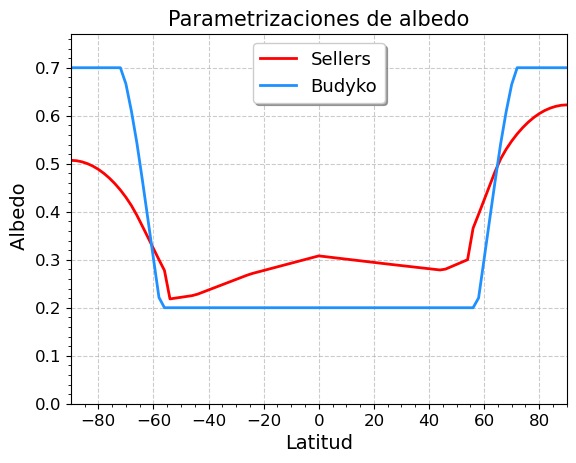

In [665]:
# generamos dos arreglos vacios solo para ver como cambia el alebdo
alphasellers=np.zeros(len(latitudes))
alphabudyko=np.zeros(len(latitudes))
# evaluamos la funcion en la insolacion para albedo 0.3 y efecto invernadero 1
Ts_0=Ts_ef(0.3,Q_annual_mean,1)

for ilat,lat in enumerate(latitudes):
    alphasellers[ilat]=modelo_prueba.albedo_sellers(Ts_0[ilat],ilat)
    alphabudyko[ilat]=modelo_prueba.alpha_budyko(Ts_0[ilat]-273.15)
    
# grafica de albedo como funcion de la latitud
plt.plot(latitudes,alphasellers,c='red',label='Sellers',linewidth=2)
plt.plot(latitudes,alphabudyko,c='dodgerblue',label='Budyko',linewidth=2)

# loc pone la leyenda donde yo le diga
plt.legend(fontsize=13,fancybox=True,shadow=True,loc='upper center')
lineplot_setup(-90,90,ymin=0,ymax=0.77,
      xlab='Latitud',ylab=' Albedo',title='Parametrizaciones de albedo')

#### Parametrizaciones de radiación saliente. 

- Sellers: `Budyko_Sellers.olrsellers`
- Budyko `Budyko_Sellers.olr_basic`

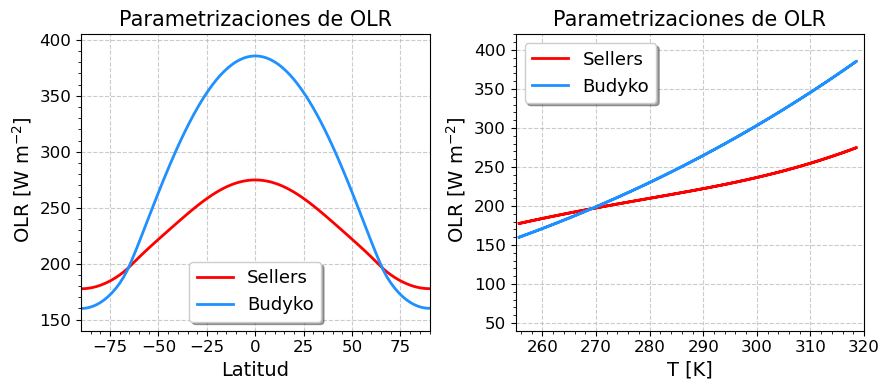

In [666]:
olrsellers=np.zeros(len(latitudes))
olrbudyko=np.zeros(len(latitudes))

for ilat,lat in enumerate(latitudes):
    olrsellers[ilat]=modelo_prueba.olr_sellers(Ts_0[ilat])
    olrbudyko[ilat]=modelo_prueba.olr_basic(Ts_0[ilat])
    
 
plt.figure(figsize=(9,4))
# grafica de OLR como funcion de la latitud   
plt.subplot(121)
plt.plot(latitudes,olrsellers,c='red',label='Sellers',linewidth=2)
plt.plot(latitudes,olrbudyko,c='dodgerblue',label='Budyko',linewidth=2)
plt.legend(fontsize=13,fancybox=True,shadow=True)
lineplot_setup(-90,90,ymin=140,ymax=405,
      xlab='Latitud',ylab=' OLR [W m$^{-2}$]',title='Parametrizaciones de OLR')
# grafica de OLR como funcion de la temperatura  
plt.subplot(122)
plt.plot(Ts_0,olrsellers,c='red',label='Sellers',linewidth=2)
plt.plot(Ts_0,olrbudyko,c='dodgerblue',label='Budyko',linewidth=2)
plt.legend(fontsize=13,fancybox=True,shadow=True)
lineplot_setup(255,320,ymin=40,ymax=420,
      xlab='T [K]',ylab=' OLR [W m$^{-2}$]',title='Parametrizaciones de OLR')
plt.tight_layout()

Parametrización de transporte: 

- Sellers: `Budyko.sellers_transport`
- Budyko `Budyko.newtonian_transport`

Para usar la parametrización de budyko se utiliza la palabra "newtonian" en el cuarto parámetro al iniciar la clase. Para la de Sellers se usa "sellers".

222.19439136818187


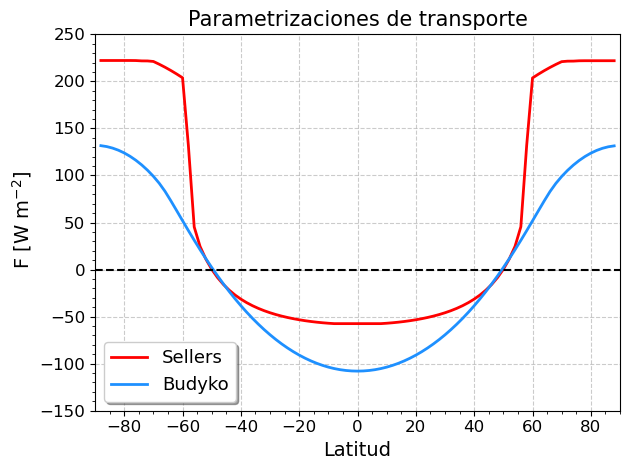

In [667]:
sellerst=modelo_prueba.sellers_transport(Ts_0)
budykot=modelo_prueba.newtonian_transport(Ts_0,np.mean(Ts_0),k_T=3.81)
print(np.max(sellerst))
plt.plot(latitudes[1:-1],sellerst[1:-1],c='red',label='Sellers',linewidth=2)
plt.plot(latitudes[1:-1],-budykot[1:-1],c='dodgerblue',label='Budyko',linewidth=2)
plt.legend(fontsize=13,fancybox=True,shadow=True)
plt.axhline(c='k',linestyle='--')
lineplot_setup(-90,90,ymin=-150,ymax=250,
      xlab='Latitud',ylab=' F [W m$^{-2}$]',title='Parametrizaciones de transporte')
plt.tight_layout()

Habiendo mostrado y discutido las principales diferencias entre las parametrizaciones, podemos resolver el modelo. Para esto se usa el método `Budyko_Sellers.solve_T` que nos arroja un resultado con un vector de temperatura para cada latitud que se obtiene al resolver la ecuación diferencial un cierto número de años.  

In [668]:
# aqui resolvemos el modelo propiamente
sellersTemp=modelo_prueba.solve_T()

Podemos ahora graficar nuestro resultado y compararlo con nuestro resultado anterior, de cuando unos ejercicios antes utilizamos el modelo de Budyko para nuestros resultados. 

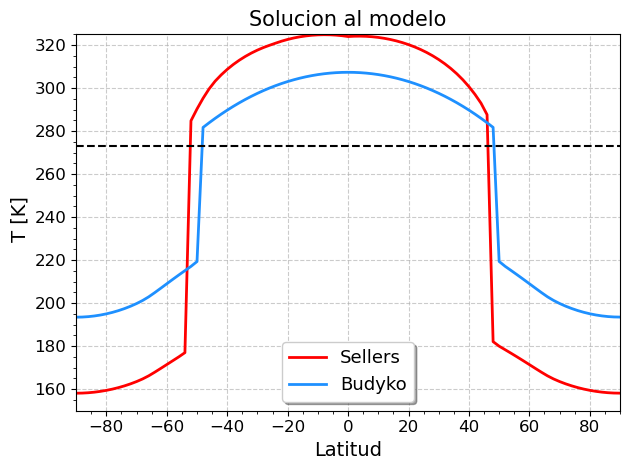

In [669]:
plt.plot(latitudes,sellersTemp,c='red',label='Sellers',linewidth=2)
plt.plot(latitudes,T_lat_2,c='dodgerblue',label='Budyko',linewidth=2)
plt.legend(fontsize=13,fancybox=True,shadow=True)
plt.axhline(y=273.15,c='k',linestyle='--')
lineplot_setup(-90,90,ymin=150,ymax=325,
      xlab='Latitud',ylab=' T [K]',title='Solucion al modelo')
plt.tight_layout()

In [670]:
modelo_mixto=Budyko_Sellers(latitudes,'sellers','sellers','newtonian',kt=4)
mixTemp=modelo_mixto.solve_T()

Corriendo modelo de Budyko-Sellers con la siguiente configuracion
OLR parametrization  sellers
Albedo parametrization  sellers
Transport parametrization  newtonian


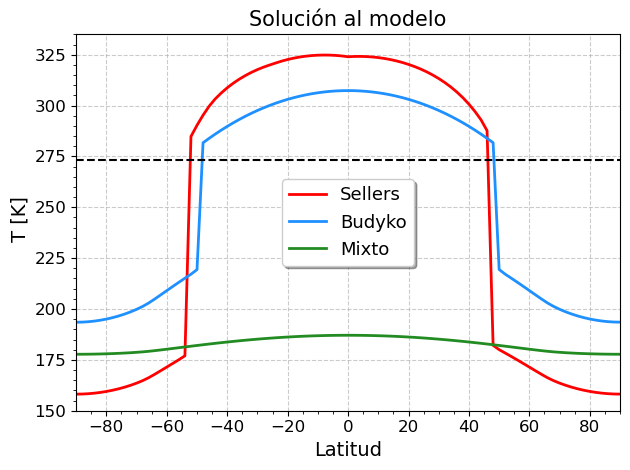

In [671]:
plt.plot(latitudes,sellersTemp,c='red',label='Sellers',linewidth=2)
plt.plot(latitudes,T_lat_2,c='dodgerblue',label='Budyko',linewidth=2)
plt.plot(latitudes,mixTemp,c='forestgreen',label='Mixto',linewidth=2)
plt.axhline(y=273.15,c='k',linestyle='--')
plt.legend(fontsize=13,fancybox=True,shadow=True)
lineplot_setup(-90,90,ymin=150,ymax=335,
      xlab='Latitud',ylab=' T [K]',title='Solución al modelo')
plt.tight_layout()

---
<a name='ej-1'></a>
### **<font color="DodgerBlue">Ejercicio 9 - Modelo de Budyko-Sellers </font>**

<font color="DarkBlue"> 1. Utilizando la clase `Budyko_Sellers` realice una simulación utilizando la parametrización de albedo de Sellers, pero la parametrización de OLR de Budyko y el transporte de Sellers. Para esta configuración, utilice dos valores de emisividad, uno de $0.33$ y otro de $0.66$. 
    
<font color="DarkBlue"> 2. Grafique sus experimentos en 1 gráfica de línea, compárandolos en la misma gráfica con los experimentos estándar de Budyko y el de Sellers. Explique sus resultados físicamente con lo que sabe de cada formulación de los modelos y sus parametrizaciones.

---